In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
#sys.path.insert(0, '/Users/kvolk/Documents/GitHub/SBDynT/src')
sys.path.insert(0, '../src')
import run_reb
import rebound
import numpy as np
import horizons_api
import tools

import scipy.signal as signal


%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["figure.titlesize"] = 25

# First, an example of filtering an idealized signal

# Working with actual data

read in data for a classical belt object I'm sure isn't in or super close to a  mean motion resonance

In [2]:
#(keep the space in sbody, it's a typo from when I ran it, but the hash has the space)\
#this will take a while, it's a 100 Myr integration with a 500 year output cadence
#sbody = '2004PY107'
#objname = '2004PY107'

sbody = 'Ceres'
objname = 'Ceres'
dt=500.
path = 'Asteroids/'+objname
#path = 'TNOs/'+objname

#these arrays are all a bit of a mess, at some point would want to 
#change it to be a multi-dimensional array for the planets so they 
#don't all have to be handled by hand
a = np.zeros(1);e = np.zeros(1);inc = np.zeros(1);
p = np.zeros(1);q = np.zeros(1);h = np.zeros(1);k = np.zeros(1);
pu = np.zeros(1);qu = np.zeros(1);hu = np.zeros(1);ku = np.zeros(1);
pj = np.zeros(1);qj = np.zeros(1);hj = np.zeros(1);kj = np.zeros(1);
ps = np.zeros(1);qs = np.zeros(1);hs = np.zeros(1);ks = np.zeros(1);
pn = np.zeros(1);qn = np.zeros(1);hn = np.zeros(1);kn = np.zeros(1);

pmc = np.zeros(1);qmc = np.zeros(1);hmc = np.zeros(1);kmc = np.zeros(1);
pv = np.zeros(1);qv = np.zeros(1);hv = np.zeros(1);kv = np.zeros(1);
pe = np.zeros(1);qe = np.zeros(1);he = np.zeros(1);ke = np.zeros(1);
pmr = np.zeros(1);qmr = np.zeros(1);hmr = np.zeros(1);kmr = np.zeros(1);
omega = np.zeros(1);
Omega = np.zeros(1);
M = np.zeros(1)
t = np.zeros(1);
#sa = rebound.SimulationArchive(path+"/archive.bin")
#sa = pd.read_csv(path+"/series_new.csv")
#print("start time %f" % sa.tmin)
#print("stop time %f" % sa.tmax)
'''
sim=sa[-1]
print(sim)
print(sim.particles)

planets = ['jupiter','saturn','uranus','neptune']
for i,sim in enumerate(sa):
    tp = sim.particles[sbody+"_bf"]
    nep = sim.particles["neptune"]
    ura = sim.particles["uranus"]
    sat = sim.particles["saturn"]
    jup = sim.particles["jupiter"]
    com = sim.calculate_com()
    o = tp.calculate_orbit(com)
    
    onep = nep.calculate_orbit(com)
    oura = ura.calculate_orbit(com)
    osat = sat.calculate_orbit(com)
    ojup = jup.calculate_orbit(com)

    t = np.append(t, sim.t)
    a = np.append(a, o.a)
    p = np.append(p, np.sin(o.inc)*np.sin(o.Omega))
    q = np.append(q, np.sin(o.inc)*np.cos(o.Omega))
    h = np.append(h, (o.e)*np.sin(o.Omega+o.omega))
    k = np.append(k, (o.e)*np.cos(o.Omega+o.omega))

    pj = np.append(pj, np.sin(ojup.inc)*np.sin(ojup.Omega))
    qj = np.append(qj, np.sin(ojup.inc)*np.cos(ojup.Omega))
    hj = np.append(hj, (ojup.e)*np.sin(ojup.Omega+ojup.omega))
    kj = np.append(kj, (ojup.e)*np.cos(ojup.Omega+ojup.omega))

    ps = np.append(ps, np.sin(osat.inc)*np.sin(osat.Omega))
    qs = np.append(qs, np.sin(osat.inc)*np.cos(osat.Omega))
    hs = np.append(hs, (osat.e)*np.sin(osat.Omega+osat.omega))
    ks = np.append(ks, (osat.e)*np.cos(osat.Omega+osat.omega))

    pu = np.append(pu, np.sin(oura.inc)*np.sin(oura.Omega))
    qu = np.append(qu, np.sin(oura.inc)*np.cos(oura.Omega))
    hu = np.append(hu, (oura.e)*np.sin(oura.Omega+oura.omega))
    ku = np.append(ku, (oura.e)*np.cos(oura.Omega+oura.omega))

    pn = np.append(pn, np.sin(onep.inc)*np.sin(onep.Omega))
    qn = np.append(qn, np.sin(onep.inc)*np.cos(onep.Omega))
    hn = np.append(hn, (onep.e)*np.sin(onep.Omega+onep.omega))
    kn = np.append(kn, (onep.e)*np.cos(onep.Omega+onep.omega))


    e = np.append(e, o.e)
    omega = np.append(omega, o.omega*180/np.pi)
    Omega = np.append(Omega, o.Omega*180/np.pi)
    M = np.append(M, o.M*180/np.pi)
    
    inc = np.append(inc, o.inc*180/np.pi)

'''
series = pd.read_csv(path+'/series.csv')
t = series['t'].values
a = series['a'].values
e = series['e'].values
inc = series['inc'].values
#omega = series['omega'].values
#Omega = series['Omega'].values
#M = series['M'].values
h = series['h'].values
k = series['k'].values
p = series['p'].values
q = series['q'].values

hj = series['hj'].values
kj = series['kj'].values
pj = series['pj'].values
qj = series['qj'].values

hs = series['hs'].values
ks = series['ks'].values
ps = series['ps'].values
qs = series['qs'].values

hu = series['hu'].values
ku = series['ku'].values
pu = series['pu'].values
qu = series['qu'].values

hn = series['hn'].values
kn = series['kn'].values
pn = series['pn'].values
qn = series['qn'].values

hmc = series['hmc'].values
kmc = series['kmc'].values
pmc = series['pmc'].values
qmc = series['qmc'].values

hv = series['hv'].values
kv = series['kv'].values
pv = series['pv'].values
qv = series['qv'].values

he = series['he'].values
ke = series['ke'].values
pe = series['pe'].values
qe = series['qe'].values

hmr = series['hmr'].values
kmr = series['kmr'].values
pmr = series['pmr'].values
qmr = series['qmr'].values

# pj = np.append(pj, np.sin(ojup.inc)*np.sin(ojup.Omega))
#    qj = np.append(qj, np.sin(ojup.inc)*np.cos(ojup.Omega))
#    hj = np.append(hj, (ojup.e)*np.sin(ojup.Omega+ojup.omega))
#    kj = np.append(kj, (ojup.e)*np.cos(ojup.Omega+ojup.omega))
'''
t = np.delete(t,0)
a = np.delete(a,0)
e = np.delete(e,0)
inc = np.delete(inc,0)
omega = np.delete(omega,0)
Omega = np.delete(Omega,0)
M = np.delete(M,0)
h = np.delete(h,0)
k = np.delete(k,0)
p = np.delete(p,0)
q = np.delete(q,0)
'''
'''
np.savetxt(path+'/t.csv',t)
np.savetxt(path+'/a.csv',a)
np.savetxt(path+'/e.csv',e)
np.savetxt(path+'/inc.csv',inc)
np.savetxt(path+'/omega.csv',omega)
np.savetxt(path+'/Omega.csv',Omega)
np.savetxt(path+'/M.csv',M)
np.savetxt(path+'/h.csv',h)
np.savetxt(path+'/k.csv',k)
np.savetxt(path+'/q.csv',q)
np.savetxt(path+'/p.csv',p)
'''
'''
np.savetxt(path+'/hj.csv',hj)
np.savetxt(path+'/hs.csv',hs)
np.savetxt(path+'/hu.csv',hu)
np.savetxt(path+'/hn.csv',hn)
np.savetxt(path+'/kj.csv',kj)
np.savetxt(path+'/ks.csv',ks)
np.savetxt(path+'/ku.csv',ku)
np.savetxt(path+'/kn.csv',kn)
np.savetxt(path+'/qj.csv',qj)
np.savetxt(path+'/qs.csv',qs)
np.savetxt(path+'/qu.csv',qu)
np.savetxt(path+'/qn.csv',qn)
np.savetxt(path+'/pj.csv',pj)
np.savetxt(path+'/ps.csv',ps)
np.savetxt(path+'/pu.csv',pu)
np.savetxt(path+'/pn.csv',pn)'''


"\nnp.savetxt(path+'/hj.csv',hj)\nnp.savetxt(path+'/hs.csv',hs)\nnp.savetxt(path+'/hu.csv',hu)\nnp.savetxt(path+'/hn.csv',hn)\nnp.savetxt(path+'/kj.csv',kj)\nnp.savetxt(path+'/ks.csv',ks)\nnp.savetxt(path+'/ku.csv',ku)\nnp.savetxt(path+'/kn.csv',kn)\nnp.savetxt(path+'/qj.csv',qj)\nnp.savetxt(path+'/qs.csv',qs)\nnp.savetxt(path+'/qu.csv',qu)\nnp.savetxt(path+'/qn.csv',qn)\nnp.savetxt(path+'/pj.csv',pj)\nnp.savetxt(path+'/ps.csv',ps)\nnp.savetxt(path+'/pu.csv',pu)\nnp.savetxt(path+'/pn.csv',pn)"

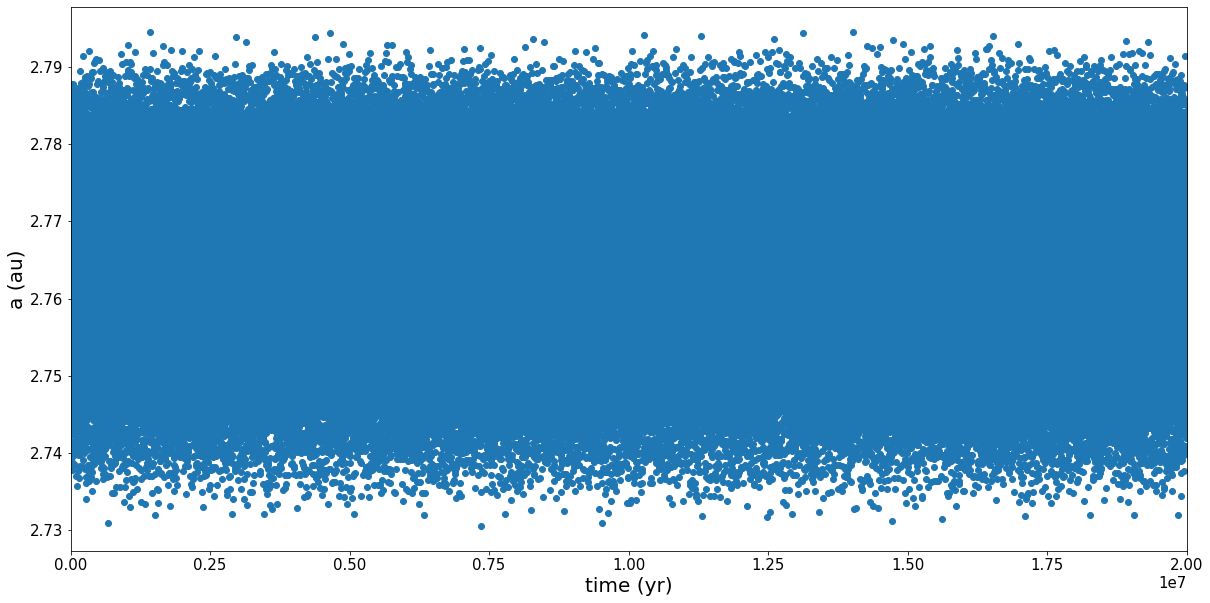

In [3]:
plt.scatter(t,a);
plt.ylabel('a (au)');
plt.xlabel('time (yr)');
plt.xlim([0,t[-1]]);


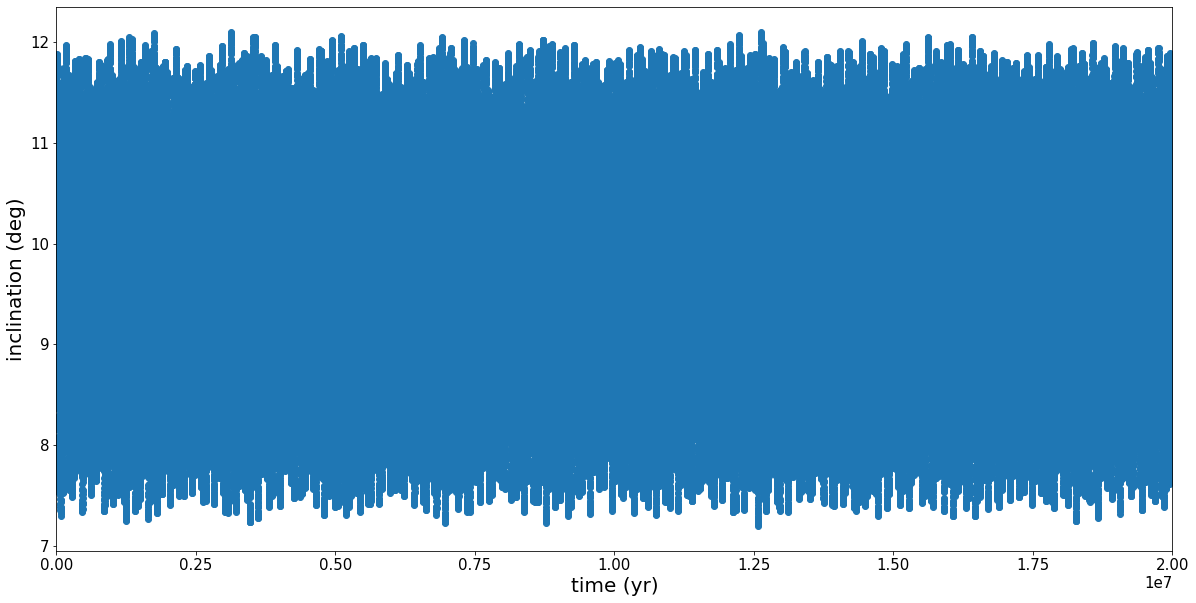

In [4]:
plt.scatter(t,inc);
plt.ylabel('inclination (deg)');
plt.xlabel('time (yr)');
plt.xlim([0,t[-1]]);

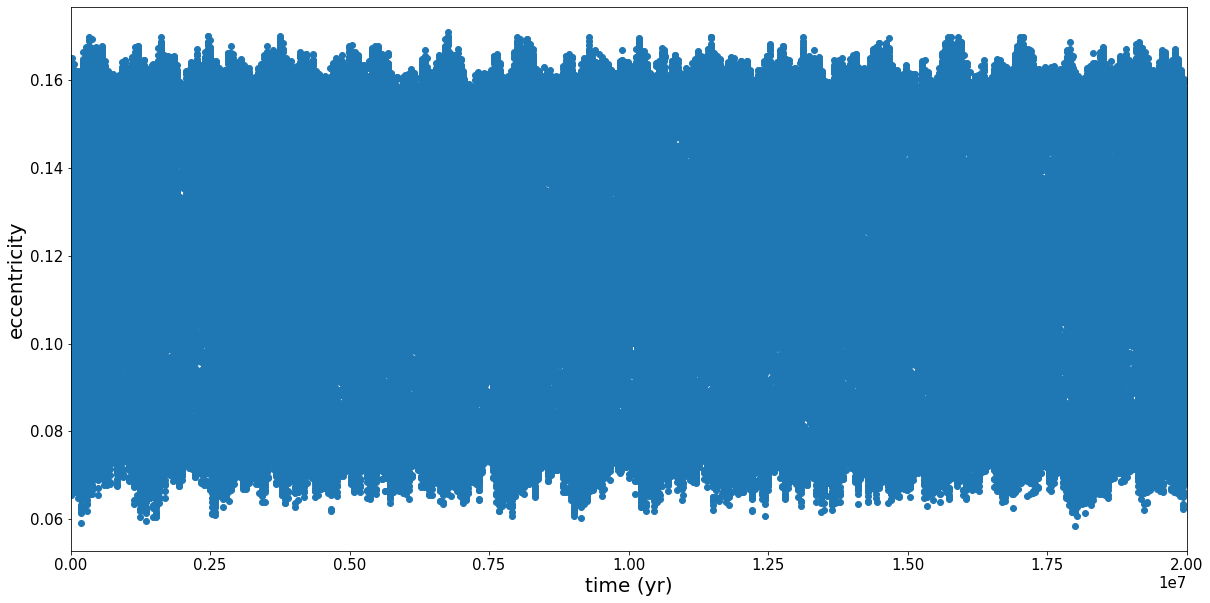

In [5]:
plt.scatter(t,e);
plt.ylabel('eccentricity');
plt.xlabel('time (yr)');
plt.xlim([0,t[-1]]);

do all the FFTs for the inclination and eccentricity vectors

In [6]:
#set up all the FFT power spectra, etc
#the outputs are not exact, but it's about 

n = len(h)
freq = np.fft.rfftfreq(n,d=dt)

#particle eccentricity vectors
Yh= np.fft.rfft(h)
Yk = np.fft.rfft(k)

#giant planets
Yhu = np.fft.rfft(hu)
Yhj = np.fft.rfft(hj)
Yhn = np.fft.rfft(hn)
Yhs = np.fft.rfft(hs)
Yku = np.fft.rfft(ku)
Ykj = np.fft.rfft(kj)
Ykn = np.fft.rfft(kn)
Yks = np.fft.rfft(ks)

Yhmc = np.fft.rfft(hmc)
Yhv = np.fft.rfft(hv)
Yhe = np.fft.rfft(he)
Yhmr = np.fft.rfft(hmr)
Ykmc = np.fft.rfft(kmc)
Ykv = np.fft.rfft(kv)
Yke = np.fft.rfft(ke)
Ykmr = np.fft.rfft(kmr)

#convert to power
pYh = np.abs(Yh)
pYk = np.abs(Yk)
pYhu = np.abs(Yhu)
pYhn = np.abs(Yhn)
pYhj = np.abs(Yhj)
pYhs = np.abs(Yhs)
pYku = np.abs(Yku)
pYkn = np.abs(Ykn)
pYkj = np.abs(Ykj)
pYks = np.abs(Yks)

pYhmc = np.abs(Yhmc)
pYhv = np.abs(Yhv)
pYhe = np.abs(Yhe)
pYhmr = np.abs(Yhmr)
pYkmc = np.abs(Ykmc)
pYkv = np.abs(Ykv)
pYke = np.abs(Yke)
pYkmr = np.abs(Ykmr)

#print(pYkmc)

#find the max power and indexes of that max power
#(disregarding the frequency=0 terms)
kumax = pYku[1:].max()
knmax = pYkn[1:].max()
ksmax = pYks[1:].max()
kjmax = pYkj[1:].max()
humax = pYhu[1:].max()
hnmax = pYhn[1:].max()
hsmax = pYhs[1:].max()
hjmax = pYhj[1:].max()

kmcmax = pYkmc[1:].max()
kvmax = pYkv[1:].max()
kemax = pYke[1:].max()
kmrmax = pYkmr[1:].max()
hmcmax = pYhmc[1:].max()
hvmax = pYhv[1:].max()
hemax = pYhe[1:].max()
hmrmax = pYhmr[1:].max()

#(these need the plus 1 to account for neglecting the f=0 term)

ihmax = np.argmax(pYh[1:])+1
ihumax = np.argmax(pYhu[1:])+1
ihnmax = np.argmax(pYhn[1:])+1 
ihsmax = np.argmax(pYhs[1:])+1 
ihjmax = np.argmax(pYhj[1:])+1
ikmax = np.argmax(pYk[1:])+1 
ikumax = np.argmax(pYku[1:])+1 
iknmax = np.argmax(pYkn[1:])+1
iksmax = np.argmax(pYks[1:])+1
ikjmax = np.argmax(pYkj[1:])+1 

ihmcmax = np.argmax(pYhmc[1:])+1
ihvmax = np.argmax(pYhv[1:])+1 
ihemax = np.argmax(pYhe[1:])+1 
ihmrmax = np.argmax(pYhmr[1:])+1 
ikmcmax = np.argmax(pYkmc[1:])+1 
ikvmax = np.argmax(pYkv[1:])+1
ikemax = np.argmax(pYke[1:])+1
ikmrmax = np.argmax(pYkmr[1:])+1 



#particle inclination vectors
Yp= np.fft.rfft(p)
Yq = np.fft.rfft(q)
#giant planets
Ypu = np.fft.rfft(pu)
Ypj = np.fft.rfft(pj)
Ypn = np.fft.rfft(pn)
Yps = np.fft.rfft(ps)
Yqu = np.fft.rfft(qu)
Yqj = np.fft.rfft(qj)
Yqn = np.fft.rfft(qn)
Yqs = np.fft.rfft(qs)

Ypmc = np.fft.rfft(pmc)
Ypv = np.fft.rfft(pv)
Ype = np.fft.rfft(pe)
Ypmr = np.fft.rfft(pmr)
Yqmc = np.fft.rfft(qmc)
Yqv = np.fft.rfft(qv)
Yqe = np.fft.rfft(qe)
Yqmr = np.fft.rfft(qmr)

#convert to power
pYp = np.abs(Yp)
pYpu = np.abs(Ypu)
pYpn = np.abs(Ypn)
pYpj = np.abs(Ypj)
pYps = np.abs(Yps)
pYq = np.abs(Yq)
pYqu = np.abs(Yqu)
pYqn = np.abs(Yqn)
pYqj = np.abs(Yqj)
pYqs = np.abs(Yqs)


pYpmc = np.abs(Ypmc)
pYpv = np.abs(Ypv)
pYpe = np.abs(Ype)
pYpmr = np.abs(Ypmr)
pYqmc = np.abs(Yqmc)
pYqv = np.abs(Yqv)
pYqe = np.abs(Yqe)
pYqmr = np.abs(Yqmr)


#find the max power and indexes of that max power
#(disregarding the frequency=0 terms)
pumax = pYpu[1:].max()
pnmax = pYpn[1:].max()
psmax = pYps[1:].max()
pjmax = pYpj[1:].max()
qumax = pYqu[1:].max()
qnmax = pYqn[1:].max()
qsmax = pYqs[1:].max()
qjmax = pYqj[1:].max()

pmcmax = pYpmc[1:].max()
pvmax = pYpv[1:].max()
pemax = pYpe[1:].max()
pmrmax = pYpmr[1:].max()
qmcmax = pYqmc[1:].max()
qvmax = pYqv[1:].max()
qemax = pYqe[1:].max()
qmrmax = pYqmr[1:].max()

ipmax = np.argmax(pYp[1:])+1
ipumax = np.argmax(pYpu[1:])+1
ipnmax = np.argmax(pYpn[1:])+1 
ipsmax = np.argmax(pYps[1:])+1 
ipjmax = np.argmax(pYpj[1:])+1 
iqmax = np.argmax(pYq[1:])+1
iqumax = np.argmax(pYqu[1:])+1 
iqnmax = np.argmax(pYqn[1:])+1
iqsmax = np.argmax(pYqs[1:])+1
iqjmax = np.argmax(pYqj[1:])+1 

ipmcmax = np.argmax(pYpmc[1:])+1
ipvmax = np.argmax(pYpv[1:])+1 
ipemax = np.argmax(pYpe[1:])+1 
ipmrmax = np.argmax(pYpmr[1:])+1 
iqmcmax = np.argmax(pYqmc[1:])+1 
iqvmax = np.argmax(pYqv[1:])+1
iqemax = np.argmax(pYqe[1:])+1
iqmrmax = np.argmax(pYqmr[1:])+1 


print("peak planet eccentricity periods (years):")
print("Mercury %f" % (1/freq[ikmcmax]))
print("Venus %f" % (1/freq[ikvmax]))
print("Earth %f" % (1/freq[ikemax]))
print("Mars %f" % (1/freq[ikmrmax]))

print("Jupiter %f" % (1/freq[ikjmax]))
print("Saturn %f" % (1/freq[iksmax]))
print("Uranus %f" % (1/freq[ikumax]))
print("Neptune %f" % (1/freq[iknmax]))


print(pYh.max())
print(pYk.max())
print(pYp.max())
print(pYq.max())

peak planet eccentricity periods (years):
Mercury 1161.985824
Venus 900905.405405
Earth 1515159.090909
Mars 363638.181818
Jupiter 1515159.090909
Saturn 229358.944954
Uranus 1515159.090909
Neptune 10000050.000000
10433.949075765278
10437.484437243027
14585.774492506134
14590.154786663112


100001
100001


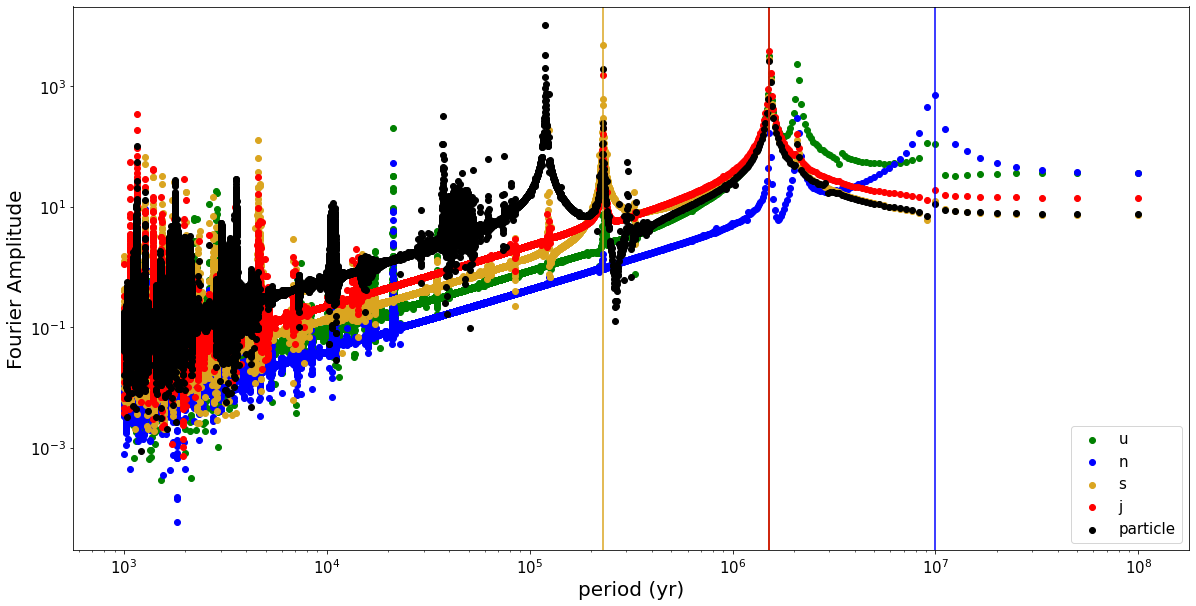

200001
200001 10433.949075765278


NameError: name 'new_pYh' is not defined

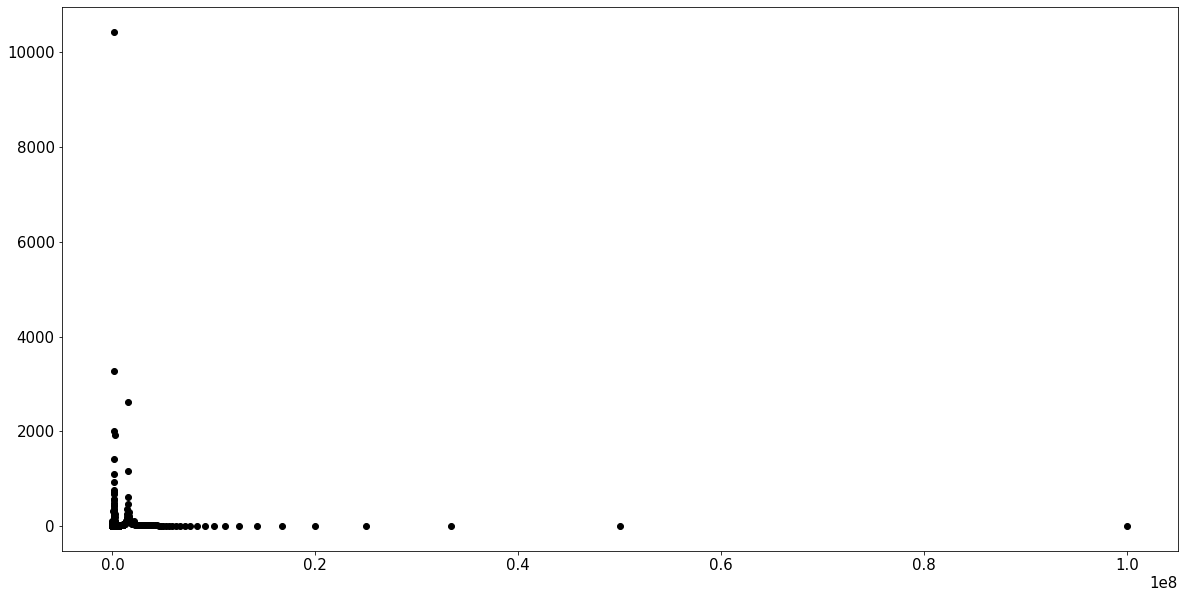

In [7]:
#plot the eccentricity spectra
import scipy
print(len(freq))
print(len(pYhu))
plt.scatter(1/freq[1:],pYhu[1:],label='u',c='g')
plt.scatter(1/freq[1:],pYhn[1:],label='n',c='b')
plt.scatter(1/freq[1:],pYhs[1:],label='s',c='goldenrod')
plt.scatter(1/freq[1:],pYhj[1:],label='j',c='r')
plt.scatter(1/freq[1:],pYh[1:],label='particle',c='k')

plt.axvline(x=1/freq[ihumax],c='g')
plt.axvline(x=1/freq[ihjmax],c='r')
plt.axvline(x=1/freq[ihsmax],c='goldenrod')
plt.axvline(x=1/freq[ihnmax],c='b')

plt.legend(loc='lower right')

plt.xlabel('period (yr)')
plt.ylabel('Fourier Amplitude')
plt.yscale('log')
plt.xscale('log')
maxp = np.max([humax,hsmax,hjmax,hnmax,pYh[1:].max()])

plt.ylim([0.00002,2*maxp]);
plt.show()

M = 200001
M = int(pYh[1:].max())
#hamming = scipy.signal.windows.hamming(M)

#hamming2 = scipy.signal.windows.hamming(len(h))
print(len(h))

pYh = np.abs(np.fft.rfft(h))


newh = h.copy()
print(len(h),pYh[1:].max())
#for i in range(int(len(h)/M)-1):
#    #print(i)
#    newh[int(i*M):int((i+1)*M)] = hamming*newh[int(i*M):int((i+1)*M)]
#newh2 = hamming2*h
#new_Yh2 = np.fft.rfft(newh2)
#new_pYh2 = np.abs(new_Yh2)
#new_Yh = np.fft.rfft(newh)
#new_pYh = np.abs(new_Yh)

plt.scatter(1/freq[1:],pYh[1:],label='particle',c='k')
plt.scatter(1/freq[1:],new_pYh[1:],label='particle hamm')
plt.scatter(1/freq[1:],new_pYh2[1:],label='particle hamm 2')
#plt.scatter(1/freq[1:],[1:],label='window',c='r')
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.scatter(range(len(h)-1),h[1:],label='particle',c='k')
plt.scatter(range(len(h)-1),newh[1:],label='particle hamm')
plt.scatter(range(len(h)-1),newh2[1:],label='particle hamm')
#plt.scatter(1/freq[1:],hamming[1:],label='window',c='r')
#plt.xscale('log')
#plt.yscale('log')
plt.show()
'''
dt=10
fs = np.linspace(1e-5,3.333e-3,2000);
times = np.arange(0,len(h),dt)
pgram = signal.lombscargle(t, h, freq[1:], normalize=False);
plt.plot(pgram)
'''

In [55]:
dt=10
fs = np.linspace(freq[ihmax-1000],freq[ihmax+999],2000);
times = np.arange(0,len(h),dt)
from astropy.timeseries import LombScargle
frequency, power = LombScargle(t, h).autopower()
pgram = signal.lombscargle(t, h, freq[1:]*2*np.pi, normalize=False);

In [9]:
print(len(fs),len(pgram))
plt.scatter(freq[1:],pgram)
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.scatter(1/freq[1:],pgram)
plt.scatter(1/freq[1:],pYh[1:])
plt.xscale('log')
plt.yscale('log')
plt.show()
r_ls = np.fft.ifft(pgram)
newt = np.fft.ifft(np.fft.rfft(t))
print(len(t),len(r_ls))
plt.scatter(t[:100000],r_ls)
plt.scatter(t,h)
plt.yscale('log')
plt.show()

NameError: name 'pgram' is not defined

100001


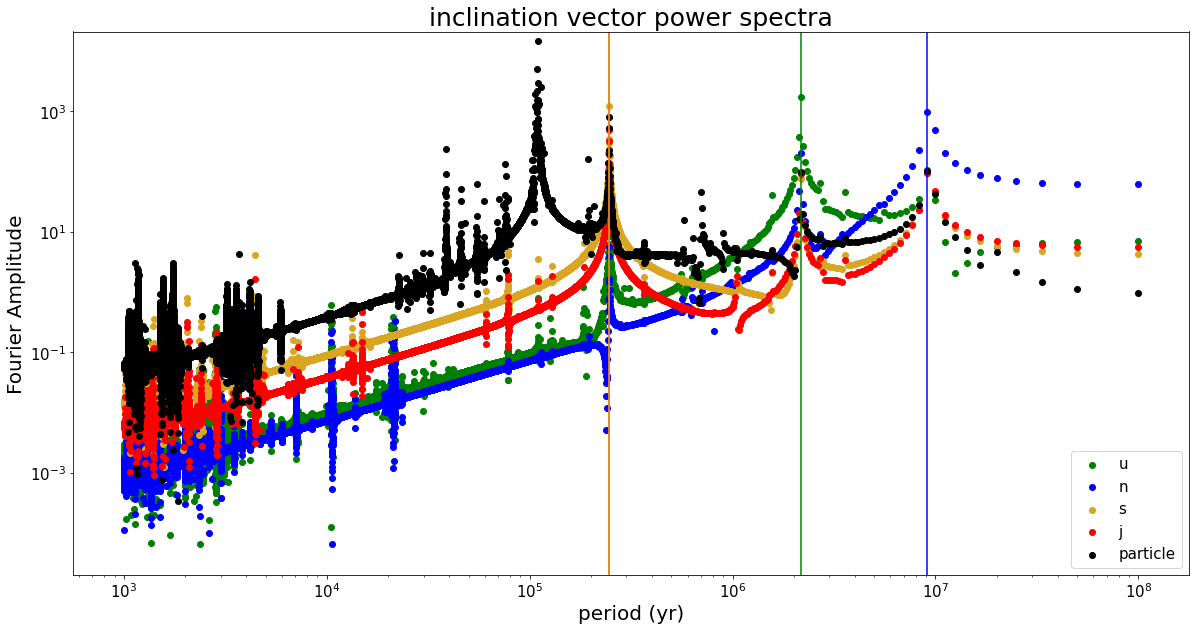

In [10]:
#plot the inclination spectra

print(len(pYpj))
plt.scatter(1/freq[1:],pYpu[1:],label='u',c='g')
plt.scatter(1/freq[1:],pYpn[1:],label='n',c='b')
plt.scatter(1/freq[1:],pYps[1:],label='s',c='goldenrod')
plt.scatter(1/freq[1:],pYpj[1:],label='j',c='r')
plt.scatter(1/freq[1:],pYp[1:],label='particle',c='k')
plt.title('inclination vector power spectra',fontsize=25)
plt.legend(loc='lower right')


plt.axvline(x=1/freq[ipumax],c='g')
plt.axvline(x=1/freq[ipjmax],c='r')
plt.axvline(x=1/freq[ipsmax],c='goldenrod')
plt.axvline(x=1/freq[ipnmax],c='b')

plt.xlabel('period (yr)')
plt.ylabel('Fourier Amplitude')
plt.yscale('log')
plt.xscale('log')
maxp = np.max([humax,hsmax,hjmax,hnmax,pYh[1:].max()])

plt.ylim([0.00002,2*maxp]);

try a simple filter to zero out the planet frequencies

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


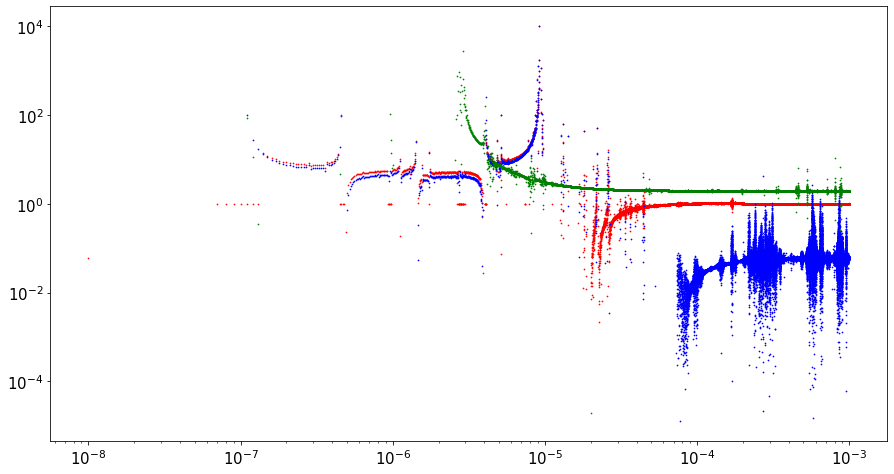

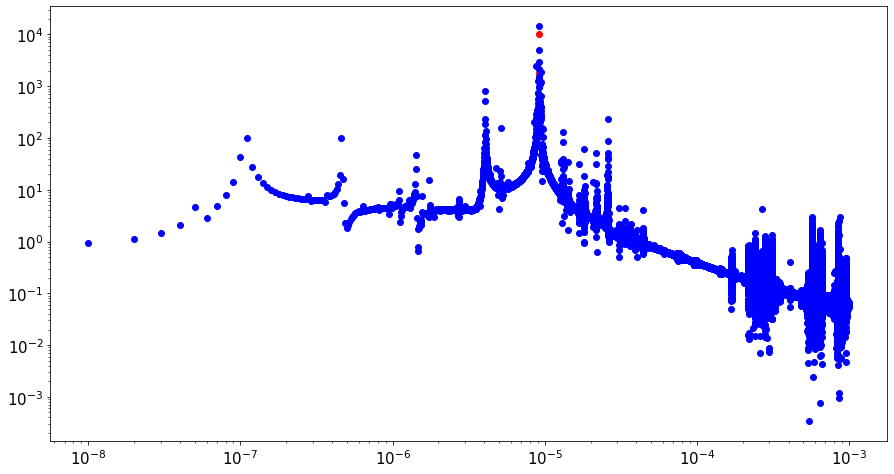

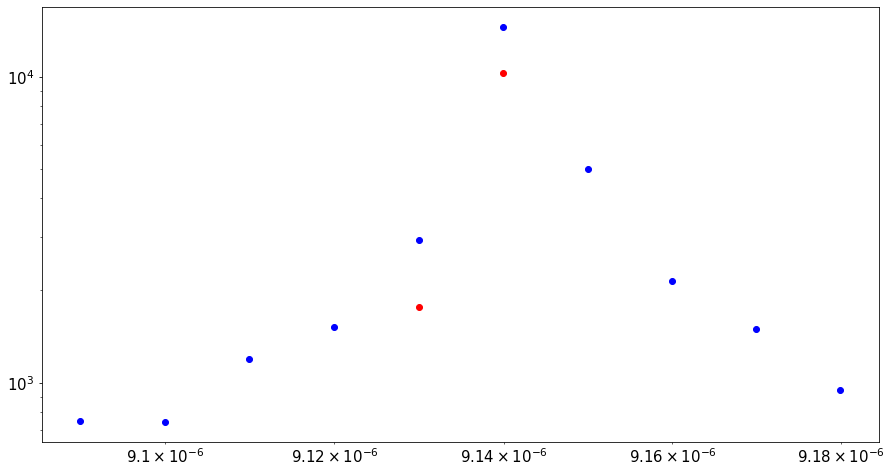

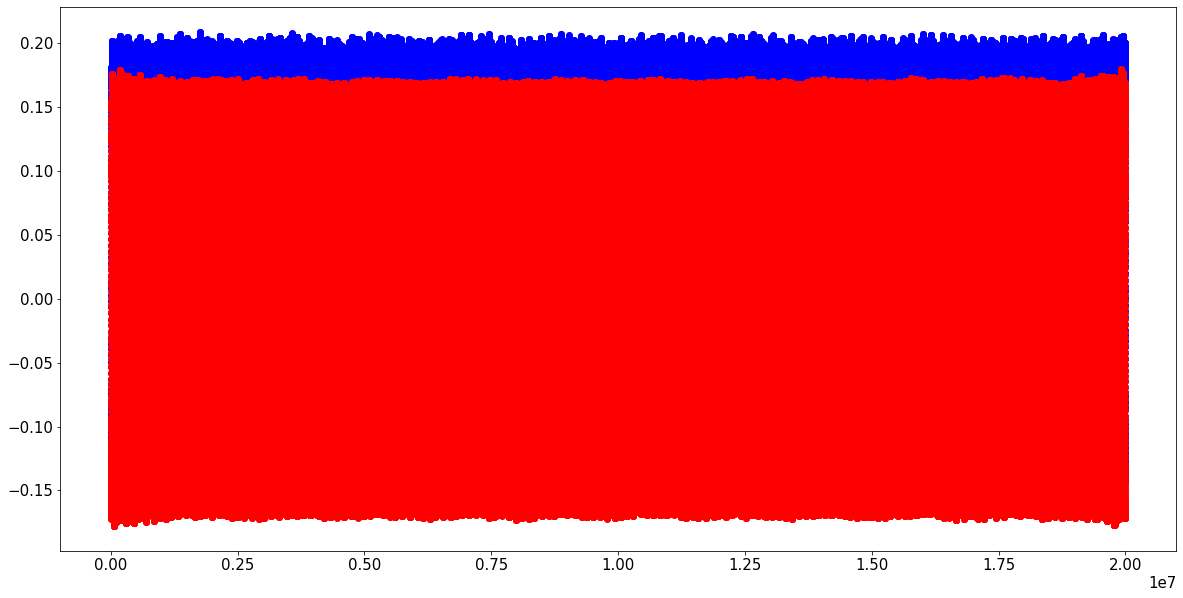

200001 200000


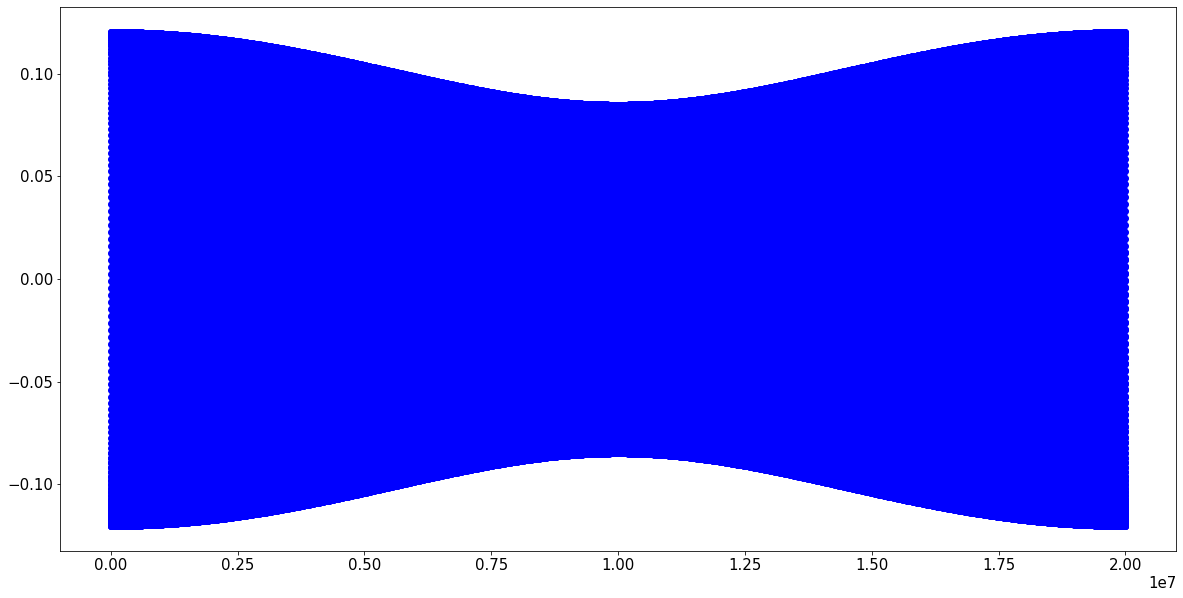

Og 0.1687769701055259
Calc: 0.16749966213920053
Single Freq: 0.09390783722487173
AstDys Sin(Inc) Ceres: 0.1675846
Og: 0.11798057252313086
Calc: 0.11504486113917717
Single Freq: 0.06708043523645048
AstDys Ecc Ceres 0.1161977


In [53]:
#make copies of the FFT outputs
Yp_f = Yp.copy()
Yq_f = Yq.copy()
Yh_f = Yh.copy()
Yk_f = Yk.copy()


imax = len(Yp)
#disregard antyhing with a period shorter than 5000 years
freqlim = 1./5000.
#disregard frequencies for which any planet has power at higher than 10% the max
pth = 0.1

spread = 1
#'''
test = np.zeros(len(Yp_f))
test[ipmax-spread:ipmax+spread] = Yp[ipmax-spread:ipmax+spread]
test_2 = np.zeros(len(Yq_f))
test_2[iqmax-spread:iqmax+spread] = Yq[iqmax-spread:iqmax+spread]
test_3 = np.zeros(len(Yh_f))
test_3[ihmax-spread:ihmax+spread] = Yh[ihmax-spread:ihmax+spread]
test_4 = np.zeros(len(Yk_f))
test_4[ikmax-spread:ikmax+spread] = Yk[ikmax-spread:ikmax+spread]
'''
test = np.zeros(len(Yp_f))
test[:ipmax+spread] = Yp[:ipmax+spread]
test_2 = np.zeros(len(Yq_f))
test_2[:iqmax+spread] = Yq[:iqmax+spread]
test_3 = np.zeros(len(Yh_f))
test_3[:ihmax+spread] = Yh[:ihmax+spread]
test_4 = np.zeros(len(Yk_f))
test_4[:ikmax+spread] = Yk[:ikmax+spread]
'''
for i in range(0,imax-1):
    if (pYpmc[i]>pth*pmcmax or pYpv[i]>pth*pvmax or pYpe[i]>pth*pemax 
       or pYpmr[i]>pth*pmrmax or pYpu[i]>pth*pumax or pYpj[i]>pth*pjmax or pYps[i]>pth*psmax 
       or pYpn[i]>pth*pnmax or freq[i]>freqlim):
        Yp_f[i]=0
    if (pYqmc[i]>pth*qmcmax or pYqv[i]>pth*qvmax or pYqe[i]>pth*qemax 
       or pYqmr[i]>pth*qmrmax or pYqu[i]>pth*qumax or pYqj[i]>pth*qjmax or pYqs[i]>pth*qsmax 
       or pYqn[i]>pth*qnmax or freq[i]>freqlim):
        Yq_f[i]=0
    if (pYhmc[i]>pth*hmcmax or pYhv[i]>pth*hvmax or pYhe[i]>pth*hemax 
       or pYhmr[i]>pth*hmrmax or pYhu[i]>pth*humax or pYhj[i]>pth*hjmax or pYhs[i]>pth*hsmax 
       or pYhn[i]>pth*hnmax or freq[i]>freqlim):
        Yh_f[i]=0
    if (pYkmc[i]>pth*kmcmax or pYkv[i]>pth*kvmax or pYke[i]>pth*kemax 
       or pYkmr[i]>pth*kmrmax or pYku[i]>pth*kumax or pYkj[i]>pth*kjmax or pYks[i]>pth*ksmax 
       or pYkn[i]>pth*knmax or freq[i]>freqlim):
        Yk_f[i]=0


    
p_f = np.fft.irfft(Yp_f,len(p))
q_f = np.fft.irfft(Yq_f,len(q))
h_f = np.fft.irfft(Yh_f,len(h))
k_f = np.fft.irfft(Yk_f,len(k))

i_p = np.fft.irfft(test,len(p))
i_q = np.fft.irfft(test_2,len(q))
i_h = np.fft.irfft(test_3,len(h))
i_k = np.fft.irfft(test_4,len(k))

plt.figure(figsize=(15,8))
plt.scatter(freq,Yp_f+1,c='r', s=0.5)
plt.scatter(freq,Yp,c='b', s=0.5)
plt.scatter(freq,Ypmr+2,c='g', s=0.5)
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.figure(figsize=(15,8))
plt.scatter(freq,np.abs(test),c='r')
plt.scatter(freq,np.abs(Yp),c='b')
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.figure(figsize=(15,8))
plt.scatter(freq[ipmax-5:ipmax+5],np.abs(test[ipmax-5:ipmax+5]),c='r')
plt.scatter(freq[ipmax-5:ipmax+5],np.abs(Yp[ipmax-5:ipmax+5]),c='b')
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.scatter(t,p,c='b')
plt.scatter(t,p_f,c='r')
plt.show()

print(len(t),len(np.fft.irfft(test)))
plt.scatter(t,np.fft.irfft(test,len(p)),c='b')
#plt.scatter(t,p_f,c='r')
plt.show()


sini = np.sqrt(p*p+q*q)
sini_f = np.sqrt(p_f*p_f + q_f*q_f)
ecc = np.sqrt(h*h+k*k)
ecc_f = np.sqrt(h_f*h_f + k_f*k_f)

sini_i = np.sqrt(i_p*i_p + i_q*i_q)
ecc_i = np.sqrt(i_h*i_h + i_k*i_k)

print('Og',np.mean(sini))
print('Calc:',np.mean(sini_f))
print('Single Freq:',np.mean(sini_i))
#print('AstDys Inc 2004PY107:',0.0112290)
print('AstDys Sin(Inc) Ceres:',0.1675846)


#print('AstDys 2004KF19', 0.0344540)
print('Og:',np.mean(ecc))
print('Calc:',np.mean(ecc_f))
print('Single Freq:',np.mean(ecc_i))
#print('AstDys Ecc 2004PY107', 0.0891079)
print('AstDys Ecc Ceres', 0.1161977)
#print('AstDys 2004KF19:', 0.0578858)

In [ ]:
#plot p,q
#note: not sure why there are stray dots not on the circle
plt.rcParams["figure.figsize"] = (10, 10)
plt.scatter(p,q,label='osculating');
plt.scatter(p_f,q_f,s=10,label='filtered');
plt.axhline(y=0,c='k');
plt.axvline(x=0,c='k');
plt.xlabel('p');
plt.xlabel('q');
plt.legend();


In [ ]:
#plot h,k
#note: not sure why there are stray dots not on the circle
plt.scatter(h,k,label='osculating');
plt.scatter(h_f,k_f,s=10,label='filtered');
plt.axhline(y=0,c='k');
plt.axvline(x=0,c='k');
plt.xlabel('h');
plt.xlabel('k');
plt.legend();
plt.rcParams["figure.figsize"] = (20, 10)

the inclination filtering does get close-ish to the proper value, eccentricity one didn't do much of anything

In [ ]:
#plot oscuilating and filtered sini
plt.scatter(t,sini,s=5,label='osculating');
plt.scatter(t,sini_f,s=0.5,label='filtered');
#plot the range from Huang et al for this object
plt.axhline(y=np.sin(11.2669*np.pi/180),c='k',label='analytical proper sini range');
plt.axhline(y=np.sin(11.4669*np.pi/180),c='k');
plt.axhline(y=np.sin(11.0669*np.pi/180),c='k');
plt.xlabel('time(years)');
plt.ylabel('sin(i)');
plt.legend();

plt.xlim([0,t[-1]]);

In [ ]:
#plot oscuilating and filtered eccentrcicity
plt.scatter(t,ecc,s=5,label='osculating');
plt.scatter(t,ecc_f,s=0.5,label='filtered');

plt.xlabel('time(years)');
plt.ylabel('eccentricity');
plt.legend();

plt.xlim([0,t[-1]]);
plt.ylim([ecc.min()-0.01,ecc.max()+0.01]);

# below here are some random attempts with filters from the scipy signal package

In [ ]:
import scipy.signal
quality_factor = 3.
nmax = len(freq)
filt = freq[ipnmax]
print(1/freq[ipnmax])
fs = 1/500.

#Infinite Impulse Response Notch Filter
#Give the function a frequnecy to filter out and it will filter that specific frequency
b_f, a_f = signal.iirnotch(filt,quality_factor,fs=fs)

print(b_f, a_f)
alt_f_p = signal.filtfilt(b_f, a_f, p)
alt_f_q = signal.filtfilt(b_f, a_f, q)

tY = np.fft.rfft(alt_f_p)
ptY = np.abs(tY)

ffreq, fh = signal.freqz(b_f,a_f, fs=2.*np.pi,worN=nmax);

#Butterworth Bandstop Filter
#A digital filter that 
b, a = signal.butter(1, [freq[ipnmax-10],freq[ipnmax+10]], btype='bandstop',fs=fs)


#b_n, a_n = signal.butter(2, [freq[ipnmax-5],freq[ipnmax+25]], btype='bandstop')
print(b,a)
#alt_f_p2 = signal.filtfilt(b,a,p)
#alt_f_q2 = signal.filtfilt(b, a, q)

alt_f_p2 = signal.lfilter(b,a,p)
alt_f_q2 = signal.lfilter(b, a, q)

print(np.sum(alt_f_p2-p))

tY_2 = np.fft.rfft(alt_f_p2)
ptY2 = np.abs(tY_2)

ffreq2, fh2 = signal.freqz(b,a,fs=2*np.pi,worN=nmax)

plt.scatter(ffreq*fs/(2.*np.pi), np.abs(fh),
         c='r', label='Bandpass filter');

plt.scatter(freq, pYp,
         c='b', label='before filtering')
plt.scatter(freq, ptY,
         c='g', label='after filtering');

plt.legend();
 
plt.xlabel('Frequency [yr^{-1}]', fontsize=20);
plt.ylabel('Magnitude [dB]', fontsize=20);
plt.xscale('log');
plt.yscale('log');
plt.title('Notch Filter', fontsize=20);
plt.show()

#=================================================
plt.scatter(ffreq2*fs/(2.*np.pi), np.abs(fh2*fh),
         c='r', label='Bandpass filter');

plt.scatter(freq, pYp,
         c='b', label='before filtering')
plt.scatter(freq, ptY2,
         c='g', label='after filtering');

plt.legend();
 
plt.xlabel('Frequency [yr^{-1}]', fontsize=20);
plt.ylabel('Magnitude [dB]', fontsize=20);
plt.xscale('log');
plt.yscale('log');
plt.title('Butterworth Filter', fontsize=20);

plt.show()

In [ ]:
plt.scatter(np.arange(0,len(ptY)),np.fft.ifft(ptY)+0.8, s=0.5)
plt.scatter(np.arange(0,len(ptY2)),np.fft.ifft(ptY2)+0.4, s=0.5)
plt.scatter(np.arange(0,len(ptY2)),np.fft.ifft(pYp), s=0.5)
plt.show()

In [ ]:
alt_i_filtered = np.sqrt(alt_f_q*alt_f_q + alt_f_p*alt_f_p)
alt_i_filtered2 = np.sqrt(alt_f_q2*alt_f_q2 + alt_f_p2*alt_f_p2)
plt.figure()
plt.axes().set_aspect('equal')
plt.scatter(q,p)
plt.scatter(alt_f_q,alt_f_p,s=0.9)
plt.axhline(y=0)
plt.axvline(x=0)
plt.show()
print(alt_i_filtered)

Omega_new = np.arctan2(alt_f_p,alt_f_q)
inc_new = np.arcsin(alt_f_p/np.sin(Omega_new))

p_off = alt_f_p - np.mean(alt_f_p)
q_off = alt_f_q - np.mean(alt_f_q)

Omega_off = np.arctan2(p_off,q_off)
inc_off = np.arcsin(p_off/np.sin(Omega_off))
plt.plot(inc)
plt.plot(inc_new)
plt.plot(inc_off)
plt.show()

print(np.mean(inc_new))
print(np.mean(inc_off))
print('AstDys 2004KF19:',np.arcsin(0.0344540))

In [ ]:
plt.scatter(t,sini,s=5,label='osculating')
plt.scatter(t,alt_i_filtered,s=0.05,label='filtered')
#plt.axhline(y=np.sin(11.2669*np.pi/180))
#plt.axhline(y=np.sin(11.4669*np.pi/180))
#plt.axhline(y=np.sin(11.0669*np.pi/180))
plt.xlabel('time(years)')
plt.ylabel('sin(i)')
plt.legend()
plt.show()

plt.scatter(t,sini,s=5,label='osculating')
plt.scatter(t,alt_i_filtered2,s=0.05)
#plt.axhline(y=np.sin(11.2669*np.pi/180))
#plt.axhline(y=np.sin(11.4669*np.pi/180))
#plt.axhline(y=np.sin(11.0669*np.pi/180))
plt.xlabel('time(years)')
plt.ylabel('sin(i)')
plt.legend()
plt.show()


#plt.xlim([0,1e8])

In [ ]:
from scipy import signal

#plt.scatter(t,ecc)
plt.plot(Yp)
#plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
n = len(p)
freq2 = np.fft.fftfreq(n,d=dt)
b, a = signal.butter(1, 0.1, btype='highpass')
zi = signal.lfilter_zi(b, a)
print(len(p),len(freq2))
z, _ = signal.lfilter(b, a, p, zi=zi*p[0])
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
y = signal.filtfilt(b, a, p)
plt.figure()
plt.scatter(t, p, alpha=0.75)
#plt.scatter(t, z)
#plt.scatter(t, z2)
plt.scatter(t, y)
plt.show()
print(len(p),len(z))
plt.scatter(1/freq2, np.fft.fft(p), alpha=0.75)
#plt.scatter(1/freq2, np.fft.fft(z))
#plt.scatter(1/freq2, np.fft.fft(z2))
plt.scatter(1/freq2, np.fft.fft(y))
plt.yscale('log')
plt.xscale('log')
plt.show()

In [ ]:

print(freq[ihjmax-5], freq[ihjmax+5],freq[ihjmax+20])
b, a = signal.butter(1, [freq[ihjmax-5],freq[ihjmax+5]], btype='bandstop')
zi = signal.lfilter_zi(b, a)
print(len(pYp),len(freq))
z, _ = signal.lfilter(b, a, hj, zi=zi*hj[0])
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
y = signal.filtfilt(b, a, hj)
plt.figure()
plt.scatter(t, hj, alpha=0.75)
#plt.scatter(t, z)
#plt.scatter(t, z2)
plt.scatter(t, y)
#plt.yscale('log')
#plt.xscale('log')
plt.show()

print(y)

print(len(hj),len(freq))
new = np.fft.fft(y)
plt.scatter(1/freq2,np.fft.fft(hj))
plt.scatter(1/freq2,new)
plt.vlines(1/freq[ihjmax],ymin=1e-3,ymax=1e3)
plt.xscale('log')
plt.yscale('log')

In [ ]:
from scipy.signal import peak_widths,find_peaks
print(ihjmax, freq[ihjmax],1/freq[ihjmax])
peaks, _ = find_peaks(pYpj)
plt.plot(freq[1:],pYhj[1:])
plt.vlines(freq[ihjmax],ymin=1e-3,ymax=1e3)
results_full = peak_widths(pYpj, peaks, rel_height=5)
print(np.array(results_full))
#plt.hlines(*results_full[1:], color="C3")
plt.yscale('log')
plt.xscale('log')